In [31]:
import tcav.utils_plot as utils_plot
from tcav.utils import pickle_load
from config import root_dir, model_to_run, bottlenecks, target, concepts, version, num_random_exp, max_examples, run_parallel, num_workers
import matplotlib.pyplot as plt
import numpy as np

In [32]:
project_names = '3layerMnistCNN'

results_lst = []

# results(random同士なし)をロード
results_path = os.listdir(root_dir + 'log/' + project_names + '/tcavs')
for path in results_path:
    if project_names in path:
        results = pickle_load(root_dir + 'log/' + project_names + '/tcavs/' + path)
        results_lst.append(results)
        print(path)

3layerMnistCNN_conv1_conv2_conv3:mnist_blue:mnist-target-blue_mnist-target-green_mnist-target-purple_mnist-target-red_mnist-target-yellow_1
3layerMnistCNN_conv1_conv2_conv3:mnist_blue:simple-blue_simple-green_simple-red_simple-yellow_simple-purple_1
3layerMnistCNN_conv1_conv2_conv3:mnist_red:imagenet_blue_imagenet_green_imagenet_red_imagenet_yellow_1
3layerMnistCNN_conv1_conv2_conv3:mnist_yellow:imagenet_blue_imagenet_green_imagenet_red_imagenet_yellow_1
3layerMnistCNN_conv1_conv2_conv3:mnist_green:imagenet_blue_imagenet_green_imagenet_red_imagenet_yellow_1
3layerMnistCNN_conv1_conv2_conv3:mnist_blue:simple-blue_simple-green_simple-red_simple-yellow_simple-purple_0
3layerMnistCNN_conv1_conv2_conv3:mnist_blue:imagenet_blue_imagenet_green_imagenet_red_imagenet_yellow_1
3layerMnistCNN_conv1_conv2_conv3:mnist_green:simple-blue_simple-green_simple-red_simple-yellow_simple-purple_0
3layerMnistCNN_conv1_conv2_conv3:mnist_red:simple-blue_simple-green_simple-red_simple-yellow_simple-purple_0
3l

## TCAV スコア

In [33]:
import importlib
importlib.reload(utils_plot)

<module 'tcav.utils_plot' from '/home/tomohiro/code/tcav/tcav/utils_plot.py'>

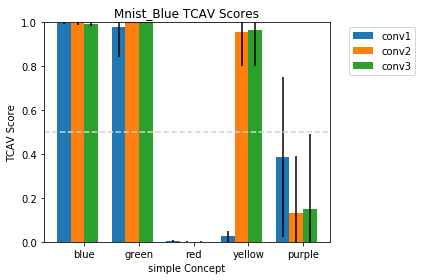

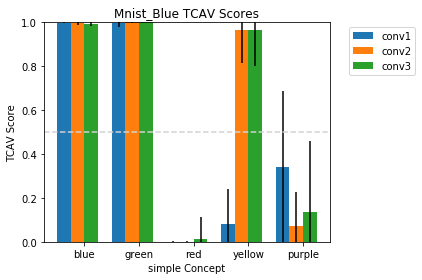

In [37]:
is_bonferroni = False
for results in [pickle_load(root_dir + 'log/' + project_names + '/tcavs/' + '3layerMnistCNN_conv1_conv2_conv3:mnist_blue:simple-blue_simple-green_simple-red_simple-yellow_simple-purple_0'),pickle_load(root_dir + 'log/' + project_names + '/tcavs/' + '3layerMnistCNN_conv1_conv2_conv3:mnist_blue:simple-blue_simple-green_simple-red_simple-yellow_simple-purple_1')]:
    utils_plot.plot_concept_results(results, num_random_exp=num_random_exp)

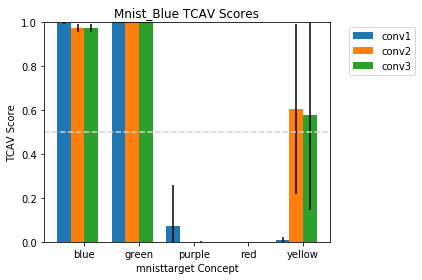

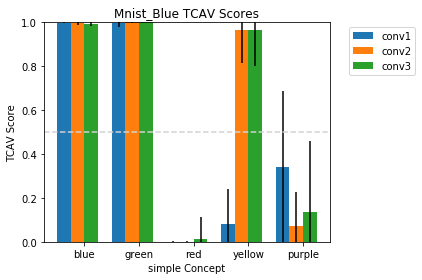

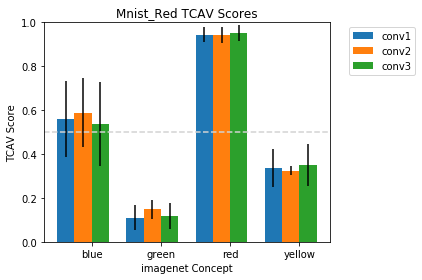

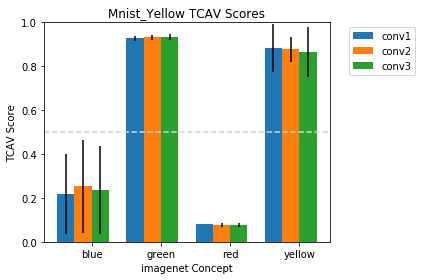

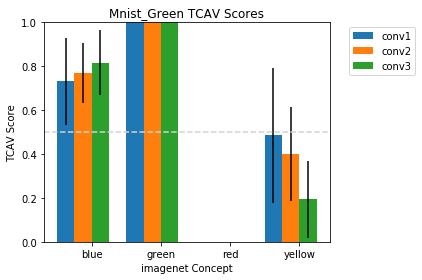

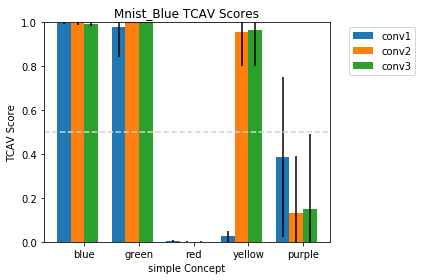

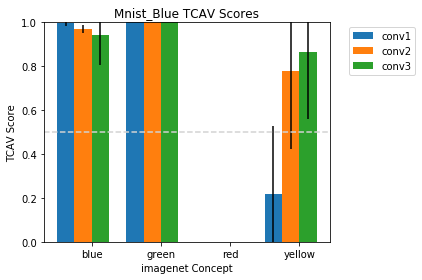

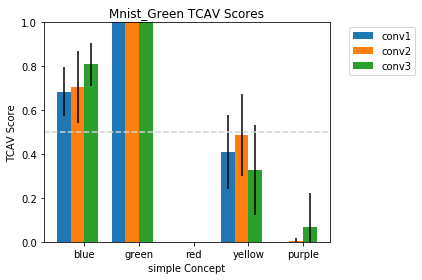

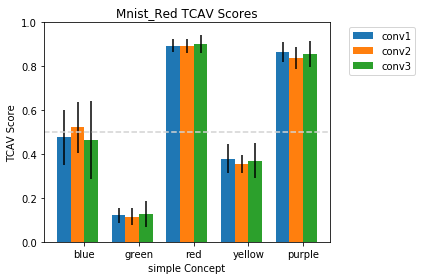

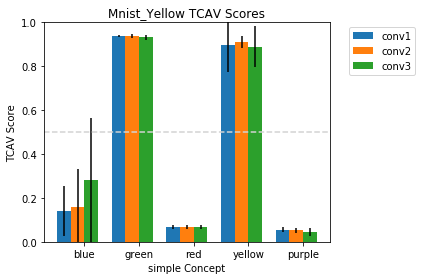

In [34]:
is_bonferroni = False
for results in results_lst:
    utils_plot.plot_concept_results(results, num_random_exp=num_random_exp)

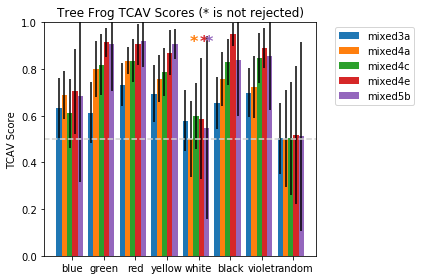

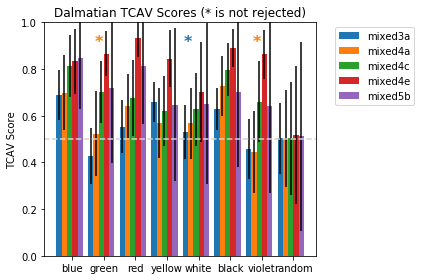

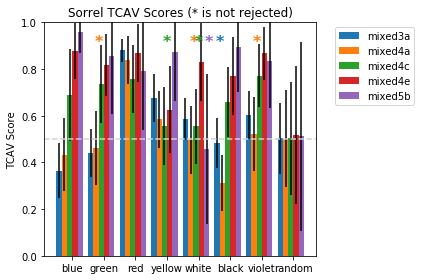

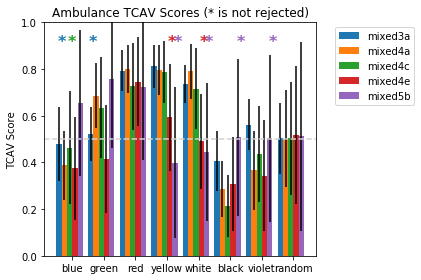

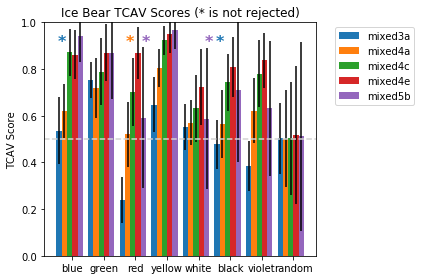

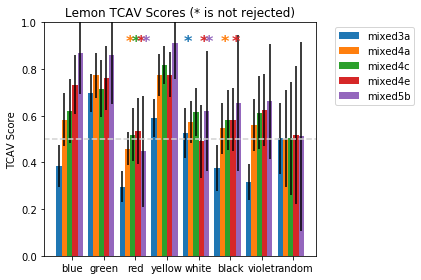

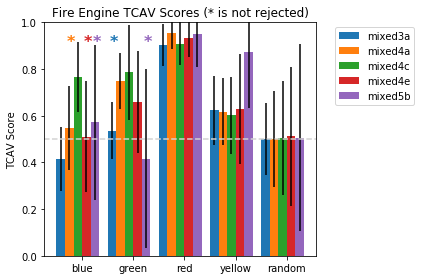

In [9]:
is_bonferroni = False
for results in results_non_dup_lst:
    utils_plot.plot_results(results, num_random_exp=num_random_exp,is_bonferroni=is_bonferroni)

## TCAVスコアの分布を可視化

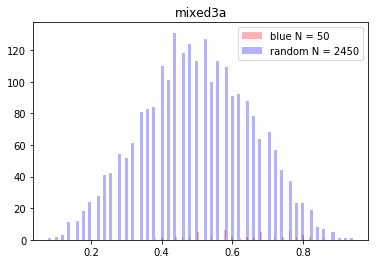

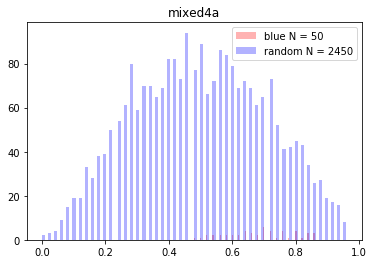

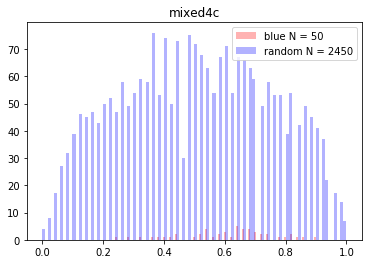

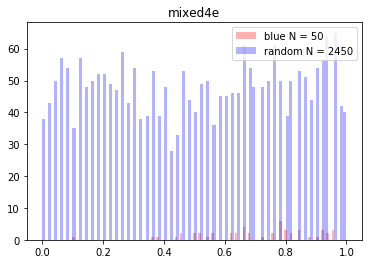

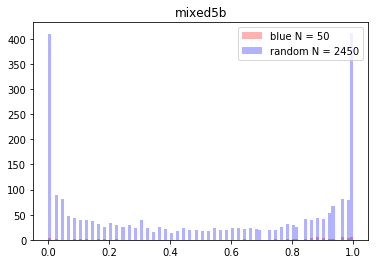

NameError: name 'あ' is not defined

In [13]:
for results in results_all_lst[:1]:
    dist = utils_plot.get_dist(results)
    for concept in dist:
        if concept != 'random':
            for bottleneck in dist[concept]:
                concept_label = '{} N = {}'.format(concept, len(dist[concept][bottleneck])) 
                random_label = 'random N = {}'.format(len(dist['random'][bottleneck]))
                plt.figure()
                plt.hist(dist[concept][bottleneck], bins=100, alpha=0.3, histtype='stepfilled', color='r',label= concept_label)
                plt.hist(dist['random'][bottleneck], bins=100, alpha=0.3, histtype='stepfilled', color='b',label = random_label)
                plt.legend()
                plt.title(bottleneck)
                plt.show()
        あ

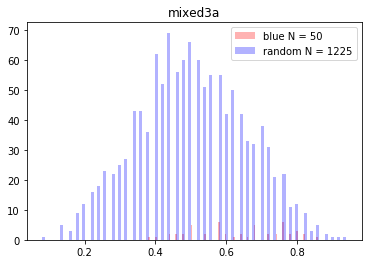

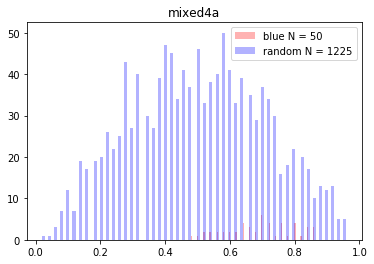

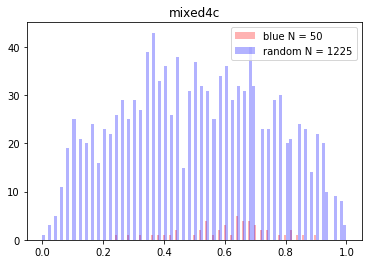

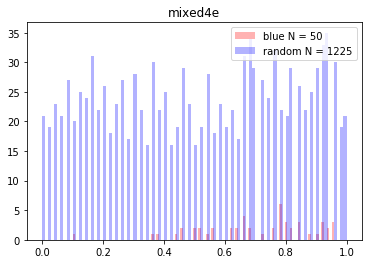

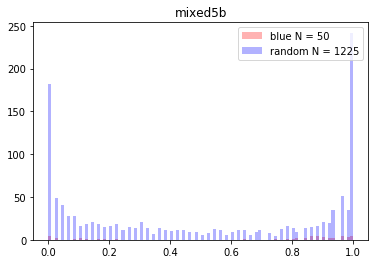

NameError: name 'あ' is not defined

In [11]:
for results in results_non_dup_lst[:1]:
    dist = utils_plot.get_dist(results)
    for concept in dist:
        if concept != 'random':
            for bottleneck in dist[concept]:
                concept_label = '{} N = {}'.format(concept, len(dist[concept][bottleneck])) 
                random_label = 'random N = {}'.format(len(dist['random'][bottleneck]))
                plt.figure()
                plt.hist(dist[concept][bottleneck], bins=100, alpha=0.3, histtype='stepfilled', color='r',label= concept_label)
                plt.hist(dist['random'][bottleneck], bins=100, alpha=0.3, histtype='stepfilled', color='b',label = random_label)
                plt.legend()
                plt.title(bottleneck)
                plt.show()
        あ

## CAVの分離精度を確認

In [35]:
# conceptごとに
for results in results_all_lst[:1]:
    cav_accuracy = utils_plot.get_cav_accuracy(results)
    for concept in cav_accuracy:
        if concept != 'random':
            for bottleneck in cav_accuracy[concept]:
                print('---------------------------------')
                print('{}:{} vs random'.format(bottleneck,concept))
                concept_acc = [list(ele.values())[0] for ele in cav_accuracy[concept][bottleneck]]
                random_acc = [list(ele.values())[1] for ele in cav_accuracy[concept][bottleneck]]
                print('CAV concept accuracy : {} ± {}'.format(np.mean(concept_acc),np.std(concept_acc)))
                print('CAV random accuracy : {} ± {}'.format(np.mean(random_acc),np.std(random_acc)))

        else:
            for bottleneck in cav_accuracy[concept]:
                print('---------------------------------')
                print('{}:random vs random'.format(bottleneck))
                acc = [list(ele.values())[2] for ele in cav_accuracy[concept][bottleneck]]
                print('CAV random accuracy : {} ± {}'.format(np.mean(acc),np.std(acc)))

---------------------------------
mixed3a:blue vs random
CAV concept accuracy : 0.9436029411764707 ± 0.05810038033870115
CAV random accuracy : 0.9951470588235294 ± 0.016465335296798125
---------------------------------
mixed4a:blue vs random
CAV concept accuracy : 0.9178676470588235 ± 0.06543543431516172
CAV random accuracy : 0.9925735294117647 ± 0.026780154720449454
---------------------------------
mixed4c:blue vs random
CAV concept accuracy : 0.9544117647058823 ± 0.060303083981801994
CAV random accuracy : 0.984264705882353 ± 0.035735899292866496
---------------------------------
mixed4e:blue vs random
CAV concept accuracy : 0.9427205882352943 ± 0.060083428516962495
CAV random accuracy : 0.9736029411764707 ± 0.0401977298202145
---------------------------------
mixed5b:blue vs random
CAV concept accuracy : 0.9185294117647059 ± 0.06930263105597274
CAV random accuracy : 0.9750735294117646 ± 0.044339454670580127
---------------------------------
mixed3a:green vs random
CAV concept accura

In [20]:
# conceptをまとめる
for results in results_all_lst[:1]:
    cav_accuracy = utils_plot.get_cav_accuracy(results)
    for bottleneck in cav_accuracy['random']:
        print('===============================')
        print('bottleneck is {}'.format(bottleneck))
        concept_acc = []
        random_acc = []
        for concept in cav_accuracy:
            if concept != 'random':
                concept_acc.extend([list(ele.values())[0] for ele in cav_accuracy[concept][bottleneck]])
                random_acc.extend([list(ele.values())[1] for ele in cav_accuracy[concept][bottleneck]])

        print('---------------------------------')
        print('concept vs random')
        print('CAV concept accuracy : {} ± {}'.format(np.mean(concept_acc),np.std(concept_acc)))
        print('CAV random accuracy : {} ± {}'.format(np.mean(random_acc),np.std(random_acc)))

        print('---------------------------------')
        print('random vs random'.format(bottleneck))
        acc = [list(ele.values())[2] for ele in cav_accuracy['random'][bottleneck]]
        print('CAV random accuracy : {} ± {}'.format(np.mean(acc),np.std(acc)))

bottleneck is mixed4c
---------------------------------
concept vs random
CAV concept accuracy : 0.933140756302521 ± 0.0880045408285691
CAV random accuracy : 0.9625 ± 0.06207467737277623
---------------------------------
random vs random
CAV random accuracy : 0.49875077303648735 ± 0.08036650815227432
bottleneck is mixed5b
---------------------------------
concept vs random
CAV concept accuracy : 0.9133508403361345 ± 0.08148217575597468
CAV random accuracy : 0.9556932773109243 ± 0.06286321618302446
---------------------------------
random vs random
CAV random accuracy : 0.4982189239332096 ± 0.08464955106321942
bottleneck is mixed4e
---------------------------------
concept vs random
CAV concept accuracy : 0.9238235294117646 ± 0.09110879502493
CAV random accuracy : 0.961922268907563 ± 0.05963604974308593
---------------------------------
random vs random
CAV random accuracy : 0.49751391465677186 ± 0.08394253022304686
bottleneck is mixed4a
---------------------------------
concept vs rand